In [34]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns

In [35]:
with open('no_quants.pk', 'rb') as handle:
    interpol_data = pickle.load(handle)

In [36]:
interpol_data.head()

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk,Length_MeetTijd,Mean HR(bpm),Std HR(bpm),Max HR(bpm),Min HR(bpm),...,Max SpO2(%),Min SpO2(%),Mode SpO2(%),Median SpO2(%),Mean NIBP(mmHg),Std NIBP(mmHg),Max NIBP(mmHg),Min NIBP(mmHg),Mode NIBP(mmHg),Median NIBP(mmHg)
1,"[15:32:32, 15:33:32, 15:34:33, 15:35:33, 15:36...","[51.0, 49.0, 57.0, 49.0, 55.0, 50.0, 56.0, 49....","[92.0, 92.0, 87.5, 93.0, 93.0, 93.0, 92.0, 95....","[118.0, 118.0, 118.0, 120.0, 120.0, 120.0, 120...",0.0,146,57.500000,24.779369,174.0,40.0,...,99.0,87.50,"([99.0], [60])",98.0,119.674658,17.845762,168.0,1.0,"([120.0], [20])",119.0
2,"[08:45:22, 08:46:23, 08:47:23, 08:48:24, 08:49...","[79.0, 75.0, 71.0, 88.0, 88.0, 84.0, 66.0, 66....","[98.0, 98.0, 98.0, 97.33333333333333, 96.66666...","[129.0, 129.0, 129.0, 129.0, 133.0, 137.0, 141...",0.0,200,63.892500,7.198242,88.0,53.0,...,100.0,91.66,"([99.0], [93])",98.5,127.280000,14.390678,145.0,1.0,"([129.0], [37])",129.0
3,"[08:40:08, 08:41:08, 08:42:09, 08:43:09, 08:44...","[102.0, 99.0, 99.0, 101.0, 96.0, 101.0, 99.0, ...","[93.0, 95.58, 96.16, 96.08, 97.83, 96.66, 97.7...","[150.0, 158.0, 2.0, 151.0, 2.0, 2.0, 152.0, 15...",0.0,178,91.977528,12.881463,111.0,64.0,...,99.0,92.00,"([97.0], [47])",97.0,103.303371,43.994102,158.0,1.0,"([2.0], [12])",107.0
4,"[09:09:53, 09:10:53, 09:11:54, 09:12:54, 09:13...","[56.0, 57.0, 56.0, 58.0, 58.0, 57.0, 57.0, 63....","[97.0, 97.0, 98.0, 97.0, 98.0, 98.0, 97.5, 98....","[136.0, 131.0, 131.0, 131.0, 131.0, 131.0, 144...",0.0,75,62.293333,6.050396,85.0,55.0,...,99.0,95.00,"([98.0], [36])",98.0,129.746667,31.110596,148.0,1.0,"([135.0], [9])",135.0
5,"[13:45:16, 13:46:17, 13:47:17, 13:48:18, 13:49...","[79.0, 84.0, 78.0, 78.0, 79.0, 79.0, 81.0, 79....","[97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97....","[115.0, 113.0, 113.0, 113.0, 108.0, 108.0, 108...",0.0,164,81.326220,8.733799,159.0,67.0,...,99.0,89.50,"([97.0], [84])",97.0,124.600610,46.194254,198.0,1.0,"([1.0], [15])",130.0


In [37]:
y = interpol_data['IcNaOk']
X = interpol_data.drop(columns=['IcNaOk'])
X = X.drop(columns=['HR(bpm)','SpO2(%)','NIBP(mmHg)','MeetTijd','Mode HR(bpm)','Mode SpO2(%)','Mode NIBP(mmHg)'])

In [38]:
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Use SMOTE

In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 568
Before OverSampling, counts of label '0': 4946 

After OverSampling, the shape of train_X: (9892, 16)
After OverSampling, the shape of train_y: (9892,) 

After OverSampling, counts of label '1': 4946
After OverSampling, counts of label '0': 4946


In [41]:
X_train_res

,Length_MeetTijd,Mean HR(bpm),Std HR(bpm),Max HR(bpm),Min HR(bpm),Median HR(bpm),Mean SpO2(%),Std SpO2(%),Max SpO2(%),Min SpO2(%),Median SpO2(%),Mean NIBP(mmHg),Std NIBP(mmHg),Max NIBP(mmHg),Min NIBP(mmHg),Median NIBP(mmHg)
0,477,64.415094,5.770415,81.000000,49.000000,63.000000,99.322851,1.292214,100.000000,94.000000,100.000000,131.224319,28.001111,184.000000,83.000000,122.000000
1,126,89.436508,25.560230,193.000000,62.000000,83.000000,98.009206,1.878269,100.000000,92.000000,99.000000,146.396825,13.305972,177.000000,111.000000,150.000000
2,186,60.682796,20.216075,211.000000,36.000000,58.000000,97.612419,1.127474,99.000000,92.000000,98.000000,124.846774,12.036276,150.000000,105.000000,119.500000
3,131,78.087786,14.920461,115.000000,55.000000,77.000000,97.895038,1.184540,100.000000,92.180000,98.000000,114.488550,13.954714,136.000000,62.000000,115.714286
4,66,64.818182,25.709867,133.000000,43.000000,52.000000,98.400152,0.712551,100.000000,97.000000,98.000000,107.515152,32.069169,129.000000,1.000000,113.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,47,77.341709,9.672507,116.768783,66.231217,75.768783,97.698159,0.479512,99.000000,96.807804,97.615609,117.292274,14.230848,150.462435,97.309261,116.693652
9888,68,95.280164,8.228094,110.717020,82.641490,95.641490,98.880051,2.557678,99.940248,90.059752,99.850621,105.633373,32.188547,172.358510,69.776772,93.187145
9889,84,75.140255,13.225730,118.890095,57.366350,70.329715,98.336410,1.284321,99.000000,94.591588,98.963365,102.731173,31.687403,138.366350,1.000000,103.146540
9890,66,64.827118,10.890231,108.379326,53.931011,61.678127,97.945210,1.106341,100.000000,94.620674,98.000000,103.582615,14.893182,134.563221,78.747116,101.241348


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = X_train_res
y = y_train_res
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 300)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)', 'Mean SpO2(%)', 'Std SpO2(%)', 'Max SpO2(%)', 'Min SpO2(%)', 'Median SpO2(%)', 'Mean NIBP(mmHg)', 'Std NIBP(mmHg)', 'Max NIBP(mmHg)', 'Min NIBP(mmHg)', 'Median NIBP(mmHg)']


Optimal number of features: 16
Selected features: ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)', 'Mean SpO2(%)', 'Std SpO2(%)', 'Max SpO2(%)', 'Min SpO2(%)', 'Median SpO2(%)', 'Mean NIBP(mmHg)', 'Std NIBP(mmHg)', 'Max NIBP(mmHg)', 'Min NIBP(mmHg)', 'Median NIBP(mmHg)']


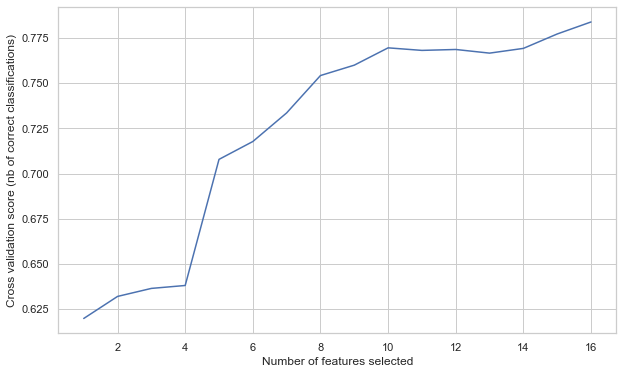

In [43]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig('/Users/jellewas/Downloads/RFE_score')
plt.show()

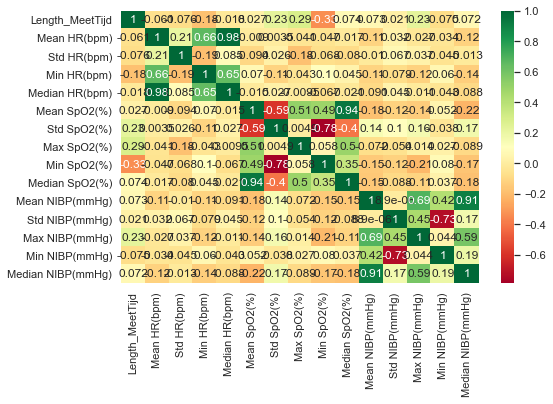

In [44]:
Selected_features = ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)', 'Mean SpO2(%)', 'Std SpO2(%)', 'Max SpO2(%)', 'Min SpO2(%)', 'Median SpO2(%)', 'Mean NIBP(mmHg)', 'Std NIBP(mmHg)', 'Max NIBP(mmHg)', 'Min NIBP(mmHg)', 'Median NIBP(mmHg)']

X = X_train_res[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.savefig('/Users/jellewas/Downloads/HeatMapRFE')
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.773
LogisticRegression log_loss is 0.492
LogisticRegression auc is 0.846


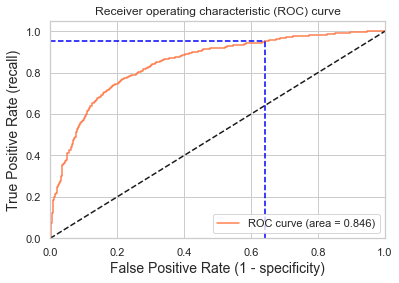

Using a threshold of 0.190 guarantees a sensitivity of 0.951 and a specificity of 0.358, i.e. a false positive rate of 64.15%.


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = X_train_res[Selected_features]
y = y_train_res
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.savefig('/Users/jellewas/Downloads/logisticROC')
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [46]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.780
LogisticRegression average log_loss is 0.486
LogisticRegression average auc is 0.851


In [47]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.780 (+/-0.014)
LogisticRegression average log_loss: 0.486 (+/-0.019)
LogisticRegression average auc: 0.851 (+/-0.013)


best params: LogisticRegression(C=0.50001)
best params: {'C': 0.50001}
best score: 0.7817419901747505


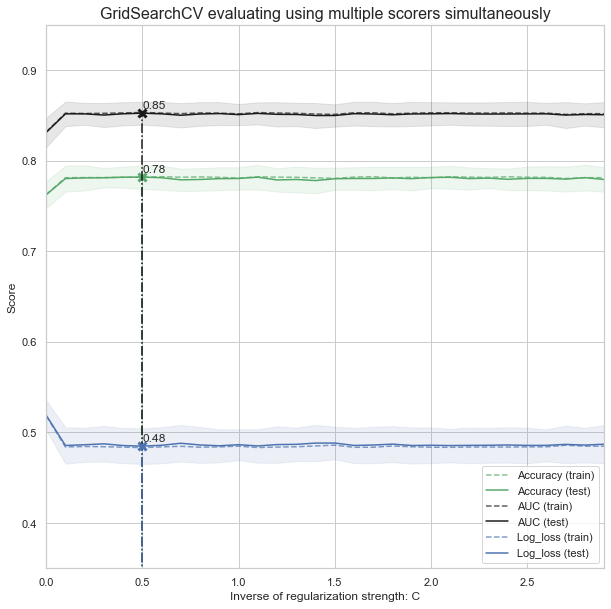

In [48]:
from sklearn.model_selection import GridSearchCV

X = X_train_res[Selected_features]
y = y_train_res
param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.savefig('/Users/jellewas/Downloads/gridScore')
plt.show()

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=2.50001))])
best params: {'clf__C': 2.50001}
best score: 0.7810956294888033


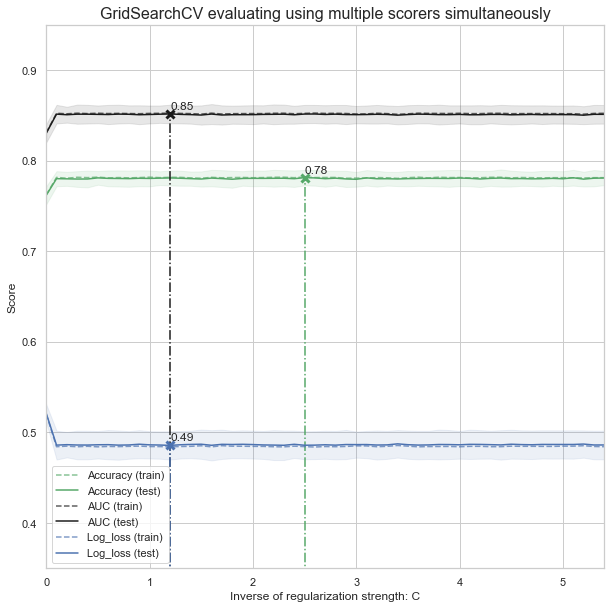

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_


print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

